<a href="https://colab.research.google.com/github/r12senthil/Machine-Learning/blob/master/Neural_Networks_1_OverFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
# Create 100 samples in the range of  0 - 6.28
x = np.linspace(0,6.28,num=100)
# Apply to sin function sin(x)
y = np.sin(x)

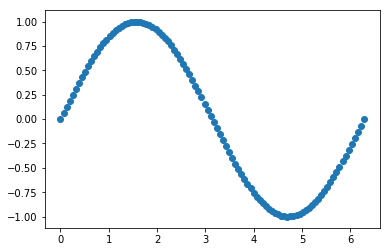

In [7]:
plt.scatter(x,y)

In [11]:
x =x.reshape((100,1))
y = y.reshape(-1,1)
x.shape,y.shape

((100, 1), (100, 1))

In [0]:
# Create a simple linear regression ;
from sklearn.preprocessing import MinMaxScaler
scx = MinMaxScaler()
scy = MinMaxScaler()
xnorm = scx.fit_transform(x)
ynorm = scy.fit_transform(y)

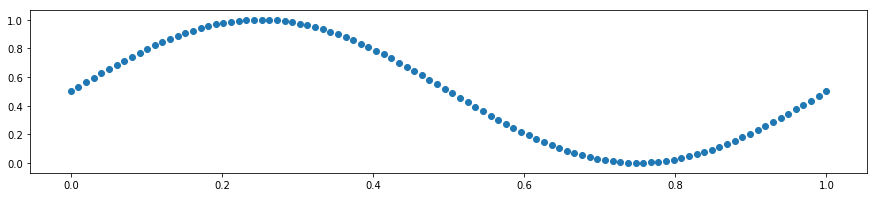

In [17]:
plt.figure(figsize=(15,3))
plt.scatter(xnorm,ynorm)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# z = (X-u)/sigma

In [0]:
# Normalization 

mean = x.mean()
std = x.std()
minimum = x.min()
maximum = x.max()
def standardscale(x):
  z = (x-mean)/std
  return z
def minmax(x):
  max = (x-minimum)/(maximum - minimum)
  return max
  

In [0]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mmx= MinMaxScaler()
mmy = MinMaxScaler()
xnorm =mmx.fit_transform(x)
ynorm = mmy.fit_transform(y)

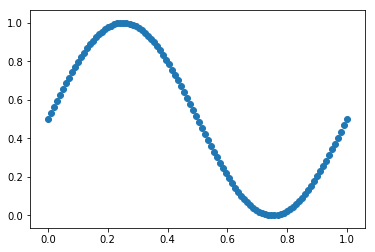

In [29]:
plt.scatter(xnorm,ynorm)

In [0]:
# Linear Regression 
# y = a+bX 


In [30]:
from sklearn.linear_model import LinearRegression
modelsk = LinearRegression()
modelsk.fit(xnorm,ynorm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
modelsk.intercept_,modelsk.coef_

(array([0.96371105]), array([[-0.92746376]]))

In [0]:
#y_predsk = modelsk.intercept_+modelsk.coef_*xnorm # model
y_predsk =modelsk.predict(xnorm)

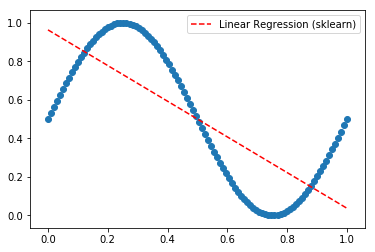

In [36]:
plt.scatter(xnorm,ynorm)
plt.plot(xnorm,y_predsk,'r--')
plt.legend(['Linear Regression (sklearn)'])


# Neural Network WiXi + b

In [37]:
import tensorflow as tf 
tf.__version__

'1.14.0-rc1'

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [0]:
def smallmodel():
  # Forward pass
  model =Sequential()
  model.add(Dense(units=1,input_shape=[1]))
  # backward pass
  model.compile(optimizer='sgd',loss='mean_squared_error')
  return model

In [43]:
model_1 =smallmodel()
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [61]:
model_1.fit(xnorm,ynorm,batch_size=32,epochs=100)          # Loss = MSE (Mean Square Error)

Epoch 1/100
100/100 [==============================] - 0s 105us/sample - loss: 0.0508
Epoch 2/100
100/100 [==============================] - 0s 65us/sample - loss: 0.0508
Epoch 3/100
100/100 [==============================] - 0s 60us/sample - loss: 0.0507
Epoch 4/100
100/100 [==============================] - 0s 65us/sample - loss: 0.0508
Epoch 5/100
100/100 [==============================] - 0s 74us/sample - loss: 0.0507
Epoch 6/100
100/100 [==============================] - 0s 76us/sample - loss: 0.0508
Epoch 7/100
100/100 [==============================] - 0s 60us/sample - loss: 0.0507
Epoch 8/100
100/100 [==============================] - 0s 78us/sample - loss: 0.0507
Epoch 9/100
100/100 [==============================] - 0s 73us/sample - loss: 0.0508
Epoch 10/100
100/100 [==============================] - 0s 67us/sample - loss: 0.0507
Epoch 11/100
100/100 [==============================] - 0s 62us/sample - loss: 0.0507
Epoch 12/100
100/100 [==============================] - 0s 70u

In [0]:
yp1=model_1.predict(xnorm)

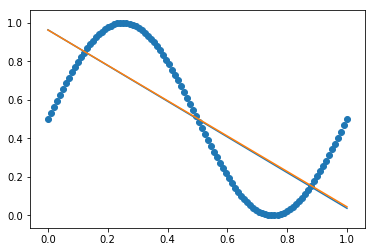

In [63]:
plt.scatter(xnorm,ynorm)
plt.plot(xnorm,y_predsk)
plt.plot(xnorm,yp1)


In [0]:
def bigmodel():
  # Forward pass
  model =Sequential()
  model.add(Dense(units=256,input_shape=[1],activation='relu'))
  model.add(Dense(units=256,activation='relu'))
  model.add(Dense(units=1))
  # backward pass
  model.compile(optimizer='adam',loss='mean_squared_error')
  return model

In [74]:
model_2 = bigmodel()
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 66,561
Trainable params: 66,561
Non-trainable params: 0
_________________________________________________________________


In [75]:
model_2.fit(x=xnorm,y=ynorm,batch_size=32,epochs=1000)

Epoch 1/1000
100/100 [==============================] - 0s 2ms/sample - loss: 0.3224
Epoch 2/1000
100/100 [==============================] - 0s 101us/sample - loss: 0.2567
Epoch 3/1000
100/100 [==============================] - 0s 123us/sample - loss: 0.2516
Epoch 4/1000
100/100 [==============================] - 0s 125us/sample - loss: 0.2416
Epoch 5/1000
100/100 [==============================] - 0s 99us/sample - loss: 0.2092
Epoch 6/1000
100/100 [==============================] - 0s 104us/sample - loss: 0.1826
Epoch 7/1000
100/100 [==============================] - 0s 110us/sample - loss: 0.1679
Epoch 8/1000
100/100 [==============================] - 0s 116us/sample - loss: 0.1490
Epoch 9/1000
100/100 [==============================] - 0s 105us/sample - loss: 0.1305
Epoch 10/1000
100/100 [==============================] - 0s 108us/sample - loss: 0.1073
Epoch 11/1000
100/100 [==============================] - 0s 102us/sample - loss: 0.0890
Epoch 12/1000
100/100 [=====================

In [0]:
yp2=model_2.predict(xnorm)

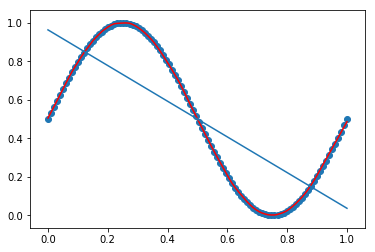

In [78]:
plt.scatter(xnorm,ynorm)
plt.plot(xnorm,yp2,'r')
plt.plot(xnorm,y_predsk)

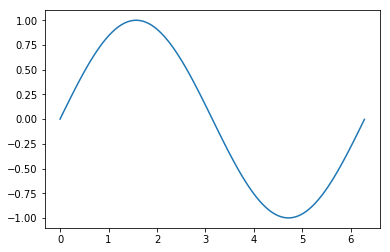

In [80]:
plt.plot(x,y)

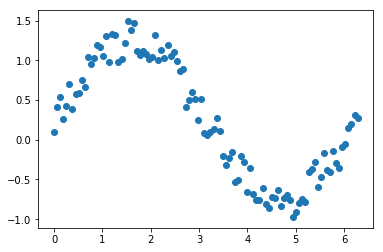

In [83]:
y_noise = y + 0.5 * np.random.rand(100).reshape((100,1))
plt.scatter(x,y_noise)

In [0]:
def bigmodel1():
  # Forward pass
  model =Sequential()
  model.add(Dense(units=256,input_shape=[1],activation='relu'))
  model.add(Dense(units=256,activation='relu'))
  model.add(Dense(units=256,activation='relu'))
  model.add(Dense(units=256,activation='relu'))
  model.add(Dense(units=1))
  # backward pass
  model.compile(optimizer='adam',loss='mean_squared_error')
  return model

In [86]:
model_3 = bigmodel1()
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


In [87]:
model_3.fit(x=xnorm,y=ynorm,batch_size=32,epochs=1000)

Epoch 1/1000
100/100 [==============================] - 0s 3ms/sample - loss: 0.3138
Epoch 2/1000
100/100 [==============================] - 0s 190us/sample - loss: 0.2370
Epoch 3/1000
100/100 [==============================] - 0s 151us/sample - loss: 0.2008
Epoch 4/1000
100/100 [==============================] - 0s 177us/sample - loss: 0.1655
Epoch 5/1000
100/100 [==============================] - 0s 159us/sample - loss: 0.1335
Epoch 6/1000
100/100 [==============================] - 0s 157us/sample - loss: 0.0919
Epoch 7/1000
100/100 [==============================] - 0s 176us/sample - loss: 0.0517
Epoch 8/1000
100/100 [==============================] - 0s 158us/sample - loss: 0.0357
Epoch 9/1000
100/100 [==============================] - 0s 158us/sample - loss: 0.0327
Epoch 10/1000
100/100 [==============================] - 0s 177us/sample - loss: 0.0263
Epoch 11/1000
100/100 [==============================] - 0s 181us/sample - loss: 0.0212
Epoch 12/1000
100/100 [====================

In [0]:
yp3=model_3.predict(xnorm)

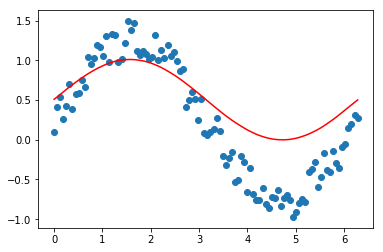

In [94]:
plt.scatter(x,y_noise)
plt.plot(x,yp3,'r')
